
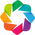

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display
import holoviews as hv
import numpy as np
import pandas as pd
from scipy import stats
hv.extension('bokeh')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster')

from shared_utilities import match_galaxies_to_catalog_pandas
from axial_ratio_comparison import cache_nsa, get_agn_catalog

In [2]:
catalog_loc = '/data/repos/find_agn/galloway_et_al_2015_data.fits'
catalog = get_agn_catalog(catalog_loc)
display(catalog.head())

,SDSS DR7 ObjID,ra,dec,PETROMAG_MZ,u-r Color,Redshift,BPT_Class,Stellar Mass,Velocity Dispersion,Velocity Dispersion Err,Rate,p_smooth_or_features,p_not_edge_on,p_bar,N_bar
0,5.877386e+17,194.59497,13.872725,-20.516970,2.043955,0.021567,1.0,9.929647,44.882000,7.4577,-0.292513,0.976000,0.954456,0.188172,38.0
1,5.880180e+17,165.39084,38.803670,-20.852238,2.717554,0.030212,0.0,10.302546,109.376602,2.9348,-0.603307,0.604381,0.929630,0.748961,10.0
2,5.877357e+17,157.58128,39.722218,-21.887474,1.885592,0.043502,1.0,10.496659,61.754501,5.7914,0.262291,0.985130,1.000000,0.146844,45.0
3,5.877369e+17,237.91920,30.608200,-20.395649,1.852366,0.032264,1.0,9.824847,6.903000,0.0000,3.676071,0.887684,0.970874,0.824855,28.0
4,5.877394e+17,136.22527,25.003923,-19.679964,2.314344,0.010065,1.0,9.726649,45.277401,5.6450,-0.588150,0.906000,1.000000,0.129490,39.0


In [3]:
axial_hist = hv.Histogram(np.histogram(catalog['ra'], bins=24), kdims='ra')
axial_hist

:Histogram   [ra]   (Frequency)

In [4]:
useful_nsa_columns = [
    'RA',
    'DEC',
#     'BASTOKES',
#     'PHISTOKES',
#     'PETRO_BA50',
#     'PETRO_PHI50',
#     'PETRO_BA90',
#     'PETRO_PHI90'
]
print(useful_nsa_columns)
nsa_loc = '/data/galaxy_zoo/decals/catalogs/nsa_v1_0_1.fits'
nsa_cache_loc = '/data/galaxy_zoo/decals/catalogs/nsa_v1`_0_1_cached.csv'

['RA', 'DEC']


In [5]:
# nsa = cache_nsa(nsa_loc, nsa_cache_loc, useful_nsa_columns)
nsa = pd.read_csv(nsa_cache_loc)

In [6]:
display(nsa.columns.values)

array(['Unnamed: 0', 'iauname', 'ra', 'dec', 'petro_ba50', 'petro_phi50',
       'petro_ba90', 'petro_phi90'], dtype=object)

In [7]:
galaxies, unmatched_galaxies = match_galaxies_to_catalog_pandas(catalog, nsa)

In [8]:
# assert unmatched_galaxies.empty
print(len(unmatched_galaxies))
print(len(galaxies))
# this is a little worrying, but let's continue

495
19261


In [9]:
display(galaxies.head())

,SDSS DR7 ObjID,ra_subject,dec_subject,PETROMAG_MZ,u-r Color,Redshift,BPT_Class,Stellar Mass,Velocity Dispersion,Velocity Dispersion Err,...,best_match,sky_separation,Unnamed: 0,iauname,ra,dec,petro_ba50,petro_phi50,petro_ba90,petro_phi90
0,5.877386e+17,194.59497,13.872725,-20.516970,2.043955,0.021567,1.0,9.929647,44.882000,7.4577,...,638322,0.155049,638322,J125822.69+135242.9,194.594974,13.872682,0.600677,88.663513,0.406396,89.337311
1,5.880180e+17,165.39084,38.803670,-20.852238,2.717554,0.030212,0.0,10.302546,109.376602,2.9348,...,398253,0.071280,398253,J110133.80+384813.2,165.390863,38.803662,0.881259,1.327972,0.868145,2.791245
2,5.877357e+17,157.58128,39.722218,-21.887474,1.885592,0.043502,1.0,10.496659,61.754501,5.7914,...,275199,0.125038,275199,J103019.50+394320.0,157.581283,39.722253,0.900981,88.200439,0.766974,30.507294
3,5.877369e+17,237.91920,30.608200,-20.395649,1.852366,0.032264,1.0,9.824847,6.903000,0.0000,...,297330,0.267635,297330,J155140.60+303629.5,237.919154,30.608263,0.659572,149.856537,0.591457,145.073761
4,5.877394e+17,136.22527,25.003923,-19.679964,2.314344,0.010065,1.0,9.726649,45.277401,5.6450,...,605621,0.431950,605621,J090454.29+250017.0,136.225386,25.003865,0.826578,113.300842,0.700661,103.856720


In [32]:
galaxies= galaxies.dropna(subset=['petro_ba90', 'petro_ba50'])

(0, 1)

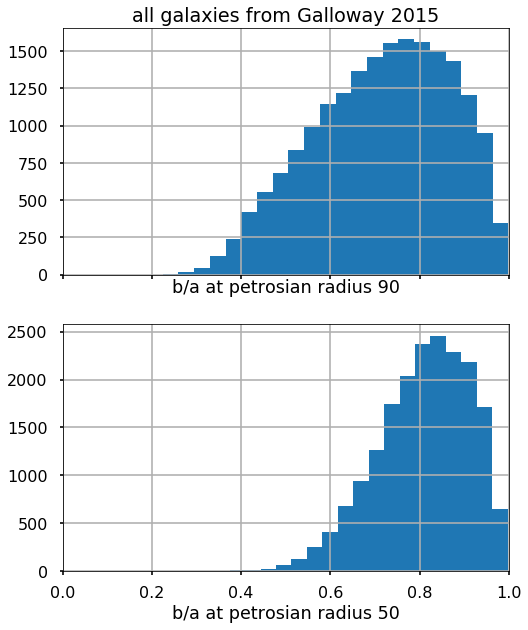

In [10]:
fig, axes = plt.subplots(2, figsize=(8, 10), sharex=True)
ax = galaxies['petro_ba90'].hist(bins=50, ax=axes[0])
ax.set_title('all galaxies from Galloway 2015')
ax.set_xlabel('b/a at petrosian radius 90')
ax = galaxies['petro_ba50'].hist(bins=50, ax=axes[1])
ax.set_xlabel('b/a at petrosian radius 50')
ax.set_xlim(0, 1)

In [13]:
ds = hv.Dataset(galaxies, kdims=['BPT_Class'], vdims=['petro_ba90'])

In [14]:
ds

:Dataset   [BPT_Class]   (petro_ba90)

In [15]:
%%opts Histogram (alpha=0.4) [width=600]
ds.hist(dimension='petro_ba90', groupby='BPT_Class', adjoin=False)

:NdOverlay   [BPT_Class]
   :Histogram   [petro_ba90]   (petro_ba90_frequency)

In [16]:
galaxies['BPT_Class'] = galaxies['BPT_Class'].astype(int).astype(str)

In [17]:
print(galaxies['BPT_Class'].value_counts())

1    10975
0     3518
2     2796
4     1300
3      672
Name: BPT_Class, dtype: int64


In [18]:
agn_mapping = {
    '0': 'undetermined',
    '1': 'star-forming',
    '2': 'composite',
    '3': 'agn',
    '4': 'liner',
}
agn_types = ['undetermined', 'star-forming', 'composite', 'agn', 'liner']
galaxies['agn_type'] = galaxies['BPT_Class'].apply(lambda x: agn_mapping[x])

In [19]:
display(galaxies['agn_type'].value_counts())

star-forming    10975
undetermined     3518
composite        2796
liner            1300
agn               672
Name: agn_type, dtype: int64

In [20]:
def plot_ba(data):
    fig, axes = plt.subplots(2, figsize=(8, 10), sharex=True)
    ax = data['petro_ba90'].hist(bins=50, ax=axes[0])
    ax.set_title('all galaxies from NSA v1_0_1')
    ax.set_xlabel('b/a at petrosian radius 90')
    ax = data['petro_ba50'].hist(bins=50, ax=axes[1])
    ax.set_xlabel('b/a at petrosian radius 50')
    ax.set_xlim(0, 1)

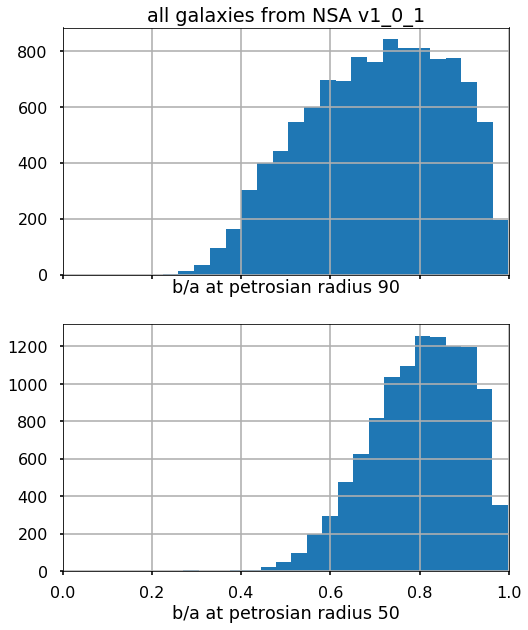

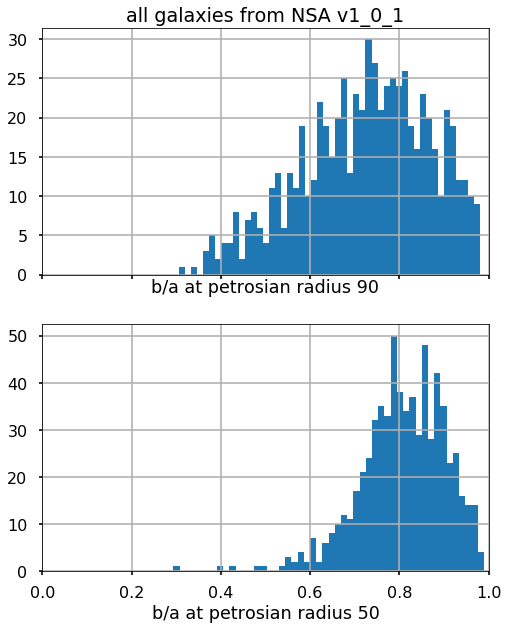

In [21]:
plot_ba(galaxies[galaxies['agn_type'] == 'star-forming'])
plot_ba(galaxies[galaxies['agn_type'] == 'agn'])

In [22]:
def plot_categorical_kde(data, type_column, value_column, categories):
    fig, ax = plt.subplots(figsize=(20, 10))
    legend = []
    for category in categories:
        selected_data = galaxies[galaxies[type_column] == category]
        ax = sns.kdeplot(data=selected_data[value_column])
        legend.append('{} (N={})'.format(category, len(selected_data)))
    ax.legend(legend)
    return fig, ax

/data/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/data/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


(0, 1.2)

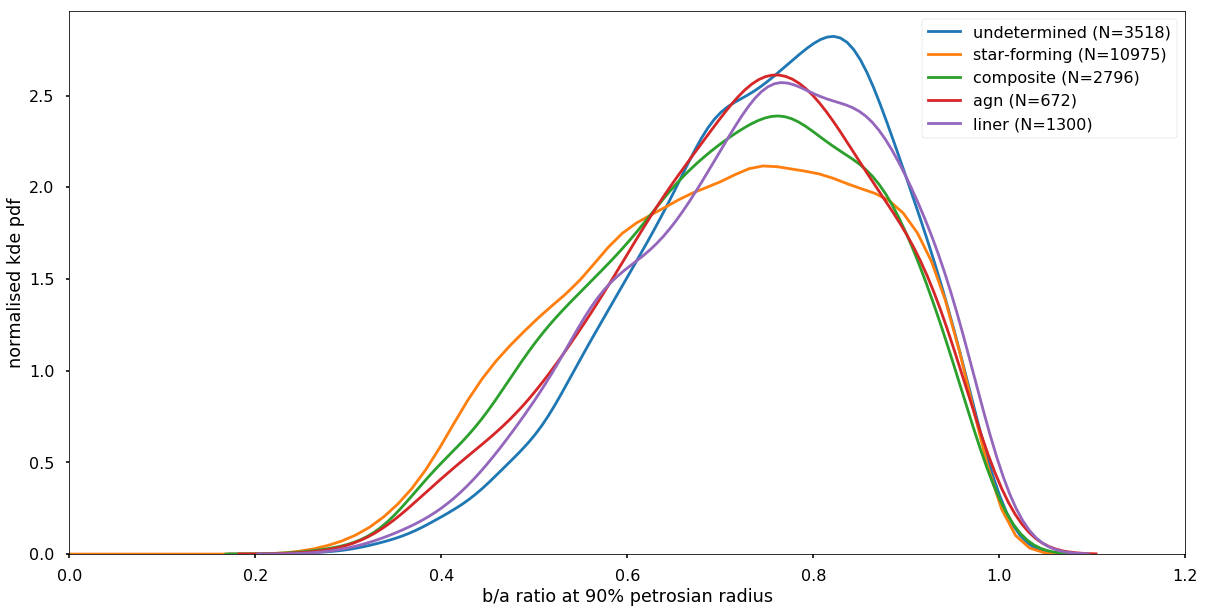

In [23]:
fig, ax = plot_categorical_kde(galaxies, 'agn_type', 'petro_ba90', agn_types)
ax.set_xlabel('b/a ratio at 90% petrosian radius')
ax.set_ylabel('normalised kde pdf')
ax.set_xlim(0, 1.2)

/data/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/data/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


(0, 1.2)

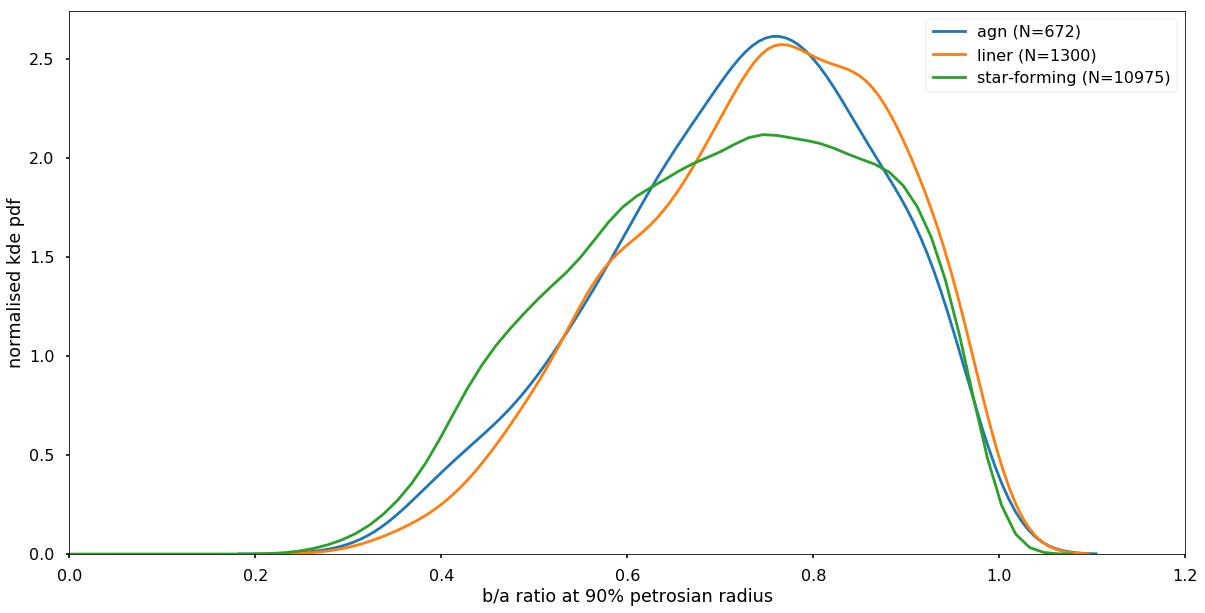

In [24]:
fig, ax = plot_categorical_kde(galaxies, 'agn_type', 'petro_ba90', ['agn', 'liner', 'star-forming'])
ax.set_xlabel('b/a ratio at 90% petrosian radius')
ax.set_ylabel('normalised kde pdf')
ax.set_xlim(0, 1.2)

/data/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/data/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


(0, 1.2)

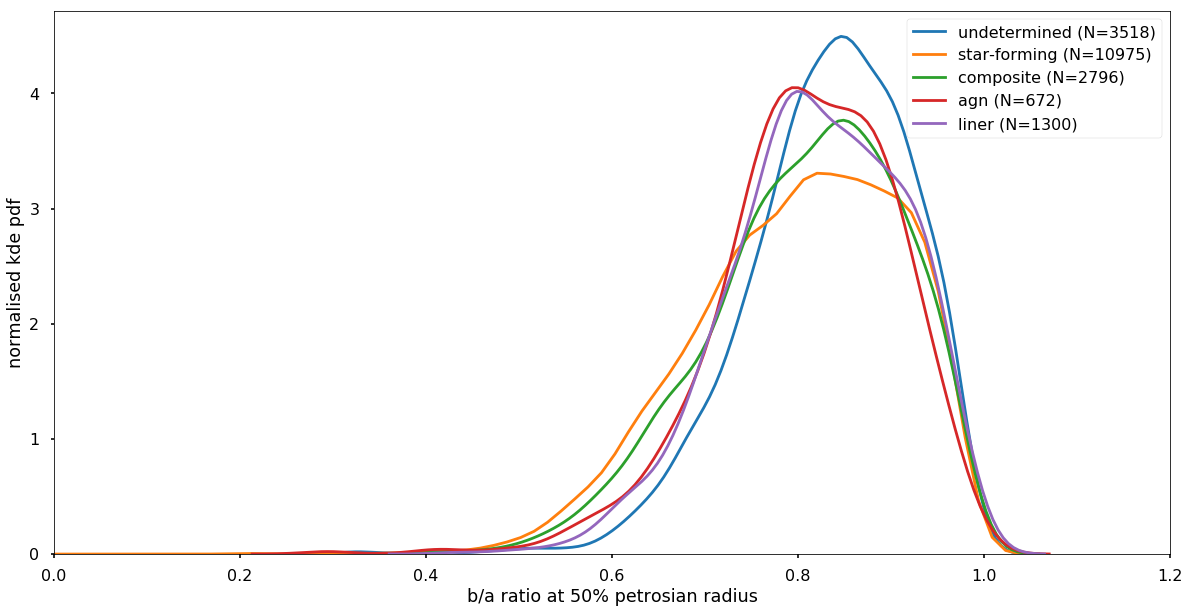

In [25]:
fig, ax = plot_categorical_kde(galaxies, 'agn_type', 'petro_ba50', agn_types)
ax.set_xlabel('b/a ratio at 50% petrosian radius')
ax.set_ylabel('normalised kde pdf')
ax.set_xlim(0, 1.2)

/data/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/data/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


(0, 1.2)

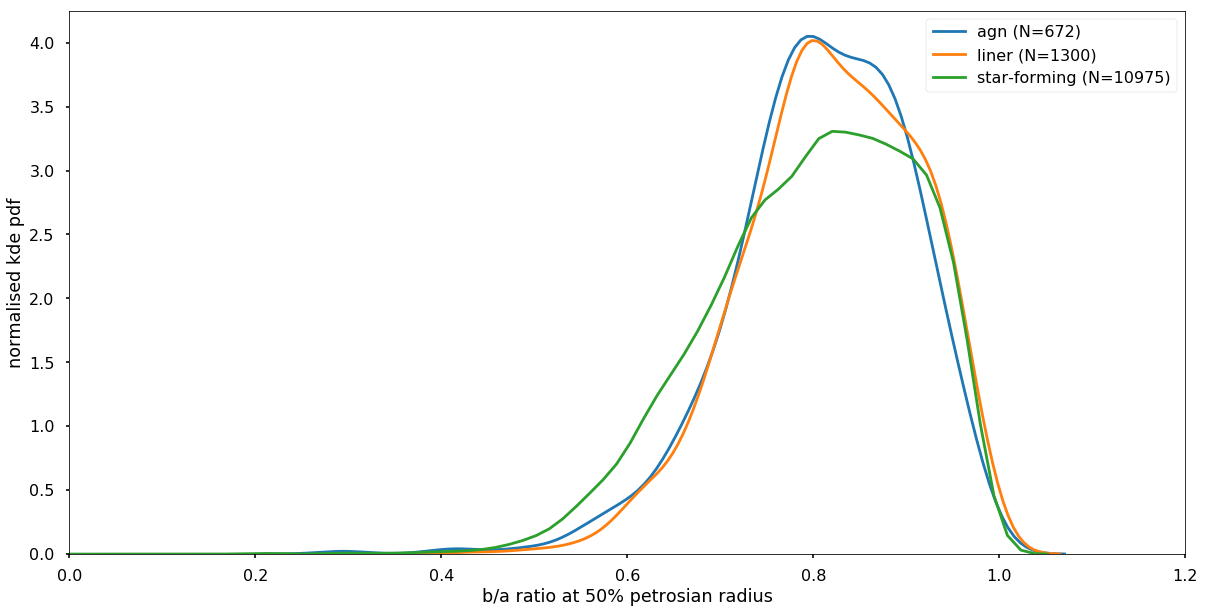

In [26]:
fig, ax = plot_categorical_kde(galaxies, 'agn_type', 'petro_ba50', ['agn', 'liner', 'star-forming'])
ax.set_xlabel('b/a ratio at 50% petrosian radius')
ax.set_ylabel('normalised kde pdf')
ax.set_xlim(0, 1.2)

In [27]:
def estimate_kde(values):  
    kernel = stats.gaussian_kde(values)
    test_values = np.linspace(0.2, 1, 100)
    estimate = kernel.pdf(test_values)
    return np.array(list(zip(test_values, estimate/estimate.sum())))

In [28]:
def get_kde_estimates(value_column):
    estimates = []
    for agn_type in agn_types:
        selected_data = galaxies[galaxies['agn_type'] == agn_type]
        estimate = estimate_kde(selected_data[value_column])
        estimates.append(estimate)
    data = dict(zip(agn_types, estimates))
    return data

In [29]:
def plot_fractional_kde_estimates(data, base_rate):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(data['agn'][:, 0], data['agn'][:, 1]/base_rate)
    ax.plot(data['liner'][:, 0], data['liner'][:, 1]/base_rate)
    ax.plot(data['agn'][:, 0], np.ones_like(data['agn'][:, 0]), 'r--')
    ax.legend(['agn', 'liner'])
    fig.tight_layout()
    plt.ylabel('fraction relative to star-forming galaxies')
    plt.xlabel('b/a ratio at petro 90')

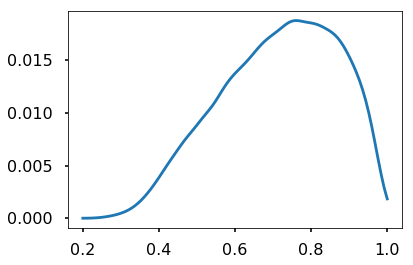

In [38]:
base_rate = estimate_kde(galaxies['petro_ba90'])
plt.plot(base_rate[:, 0], base_rate[:, 1])
base_rate = base_rate[:, 1]

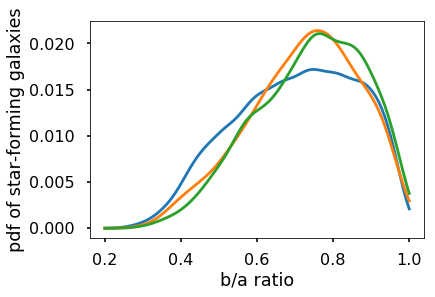

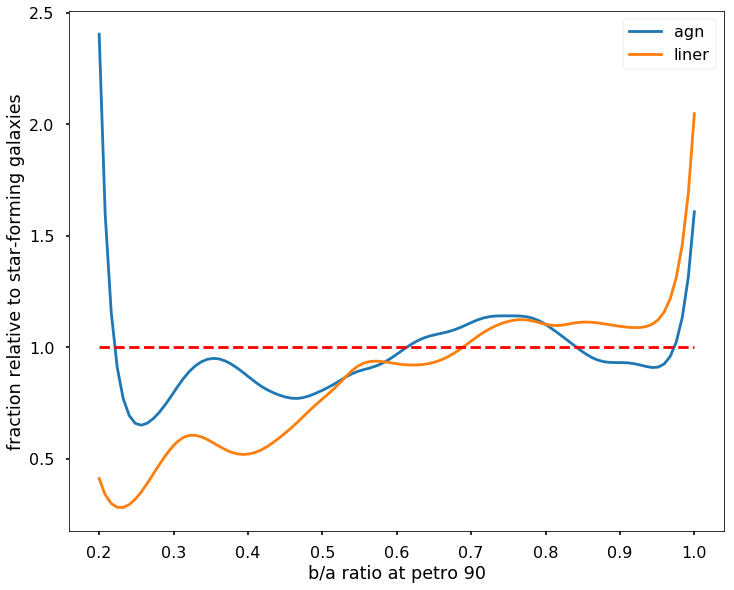

In [39]:
data = get_kde_estimates('petro_ba90')
# base_rate = data['star-forming'][:, 1]
plt.plot(data['star-forming'][:, 0], data['star-forming'][:, 1])
plt.plot(data['agn'][:, 0], data['agn'][:, 1])
plt.plot(data['liner'][:, 0], data['liner'][:, 1])
plt.xlabel('b/a ratio')
plt.ylabel('pdf of star-forming galaxies')
plot_fractional_kde_estimates(data, base_rate)

In [ ]:
data = get_kde_estimates('petro_ba50')
base_rate = data['star-forming'][:, 1]
plt.plot(data['star-forming'][:, 0], data['star-forming'][:, 1])
plot_fractional_kde_estimates(data, base_rate)

(0.25, 1.0)

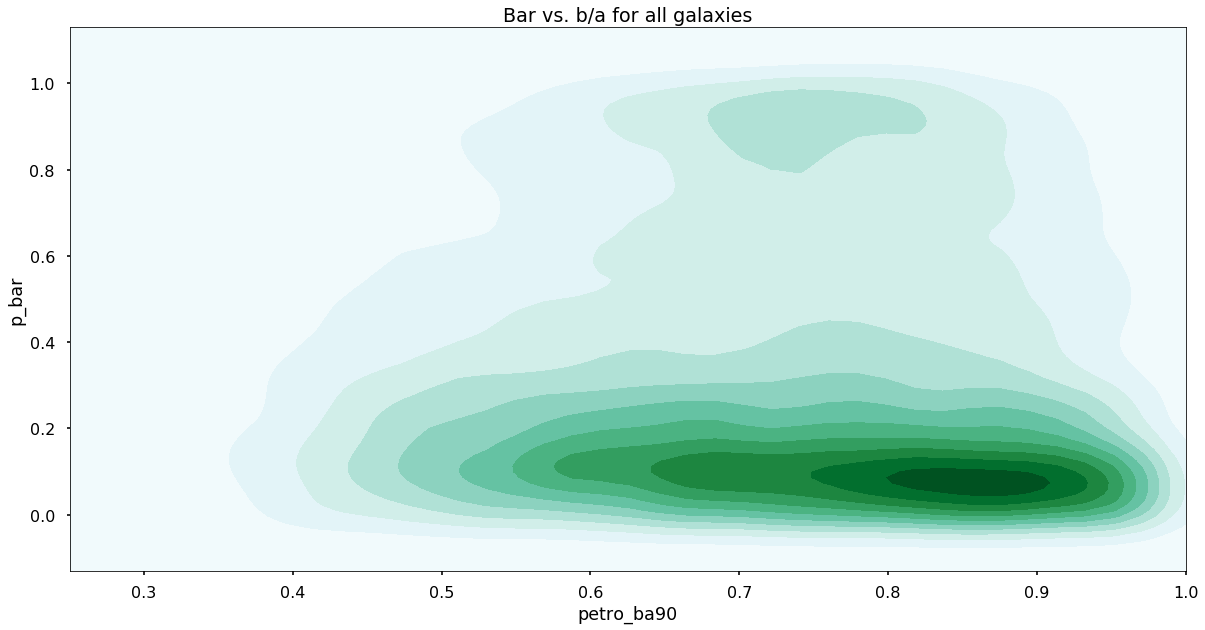

In [48]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.kdeplot(data=galaxies['petro_ba90'], data2=galaxies['p_bar'], shade=True)
ax.set_title('Bar vs. b/a for all galaxies')
ax.set_xlim(0.25, 1.)


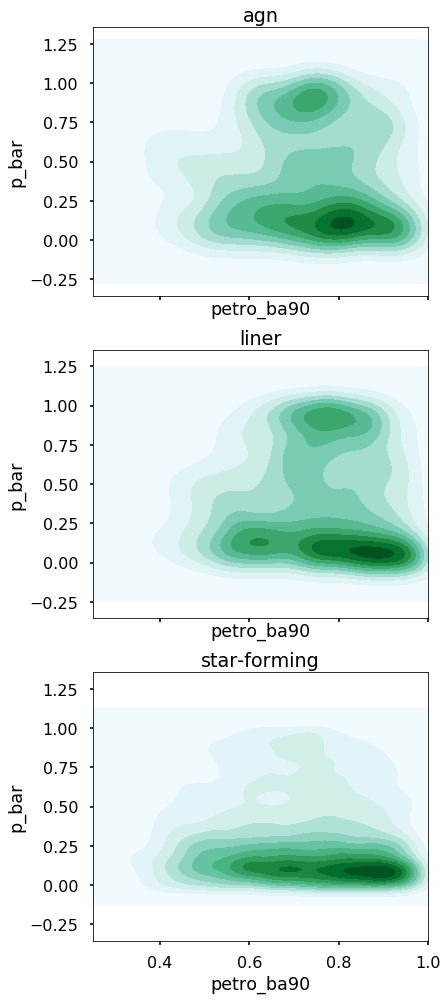

In [41]:
fig, axes = plt.subplots(3, figsize=(6, 14), sharex=True, sharey=True)
agn_types = ['agn', 'liner', 'star-forming']
for axes_n in range(len(axes)):
    agn_type = agn_types[axes_n]
    selected_data = galaxies[galaxies['agn_type'] == agn_type]
    ax = sns.kdeplot(data=selected_data['petro_ba90'], data2=selected_data['p_bar'], ax=axes[axes_n], shade=True)
    ax.set_title(agn_type)
    ax.set_xlim(0.25, 1.0)
fig.tight_layout()

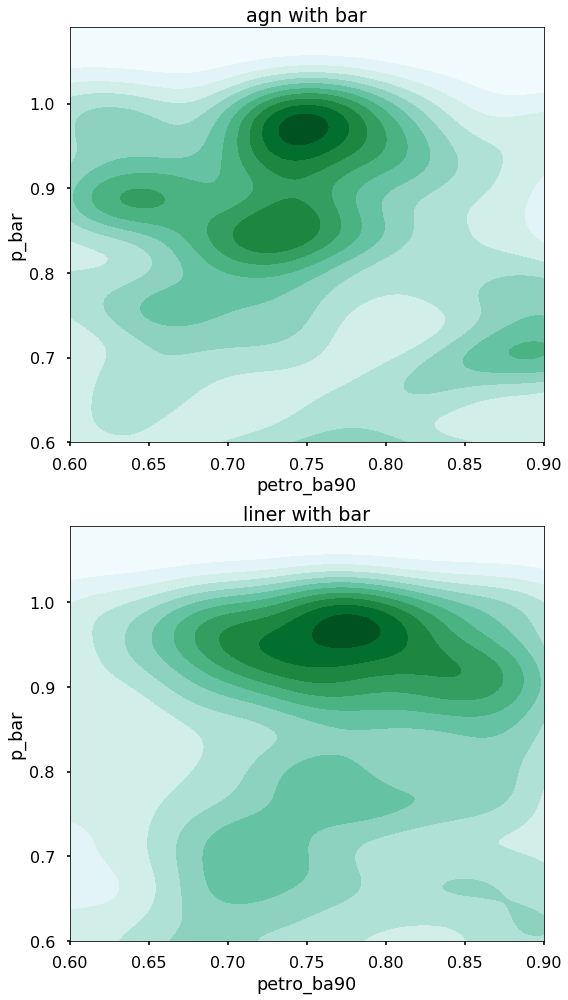

In [42]:
agn_types = ['agn', 'liner']
fig, axes = plt.subplots(len(agn_types), figsize=(8, 14))
for axes_n in range(len(axes)):
    agn_type = agn_types[axes_n]
    selected_data = galaxies[galaxies['agn_type'] == agn_type]
    clip=[(0.6, 0.9), (0.6, 1.2)]
    ax = sns.kdeplot(data=selected_data['petro_ba90'], data2=selected_data['p_bar'], ax=axes[axes_n], clip=clip, shade=True, bw=0.03)
    ax.set_title('{} with bar'.format(agn_type))
fig.tight_layout()

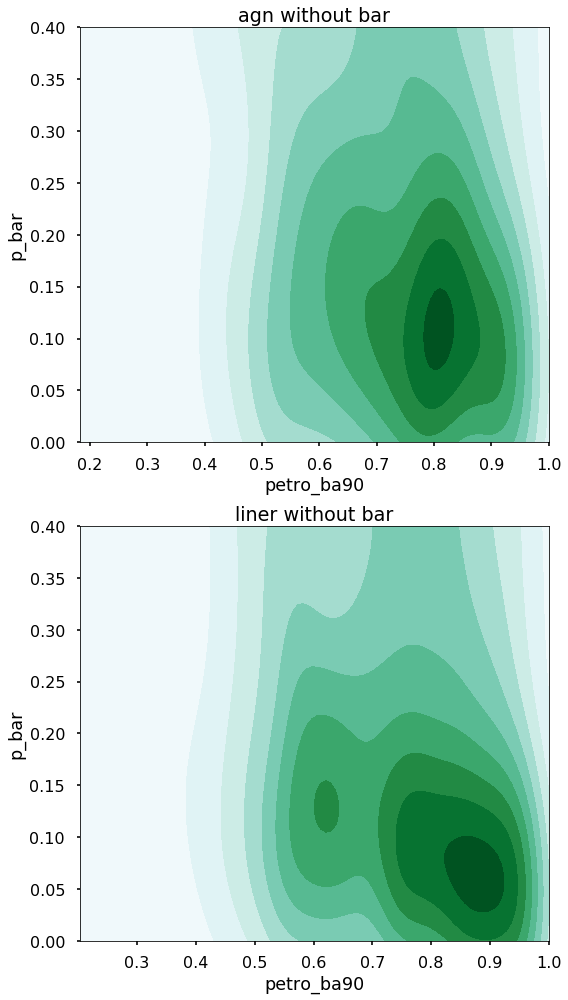

In [43]:
agn_types = ['agn', 'liner']
fig, axes = plt.subplots(len(agn_types), figsize=(8, 14))
for axes_n in range(len(axes)):
    agn_type = agn_types[axes_n]
    selected_data = galaxies[galaxies['agn_type'] == agn_type]
    clip=[(0., 1.), (0., .4)]
    ax = sns.kdeplot(data=selected_data['petro_ba90'], data2=selected_data['p_bar'], ax=axes[axes_n], clip=clip, shade=True)
    ax.set_title('{} without bar'.format(agn_type))
fig.tight_layout()